In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Prediction vs Actual Plot (Validation)

In [9]:
def plot_val(val):
    matplotlib.rcParams.update({'font.size': 14})

    plt.figure(figsize = (10,5))
    plt.plot(val['Timeval'], val['Reg_val'], label = 'Prediction', zorder = 2)
    plt.plot(val['Timeval'], val['Target_reg_val'], label = 'Actual', zorder = 1)
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.legend(ncol=2)
    plt.title('Prediction vs Actual (Regression) of ' + name.capitalize() + ' Station')
    if name == 'parigi' or name == 'lengkong' or name == 'ranca':
        plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))   
        xticks = [val['Timeval'].iloc[0], val['Timeval'].iloc[-1]]
        plt.xticks(xticks, [tick.strftime('%Y-%m-%d') for tick in xticks])
        
    else: plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
        
    plt.tight_layout()


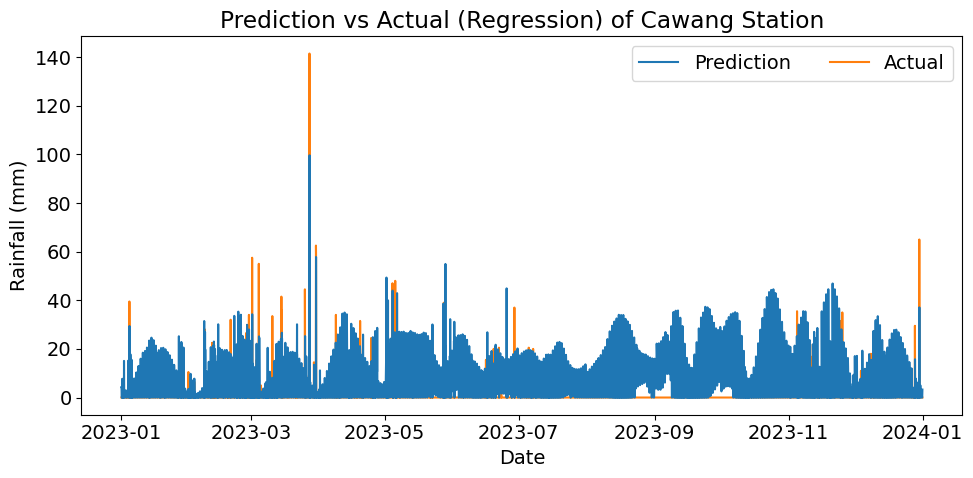

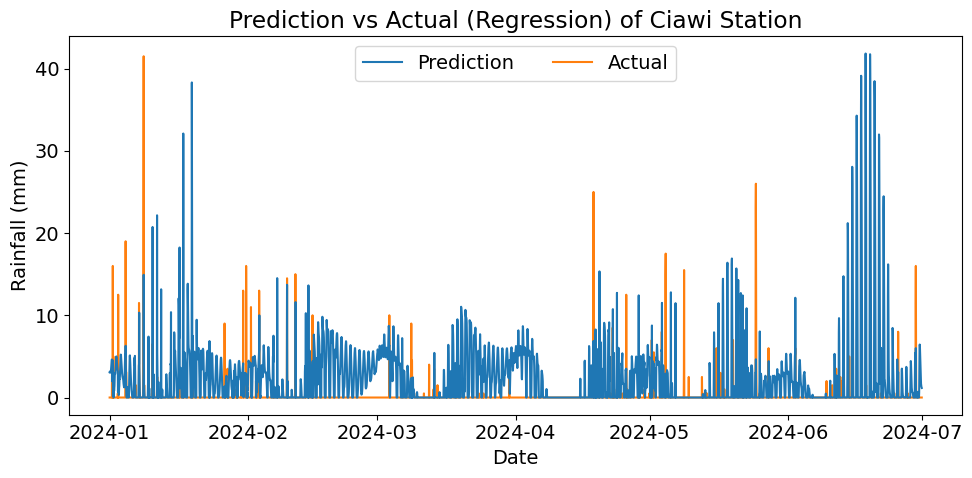

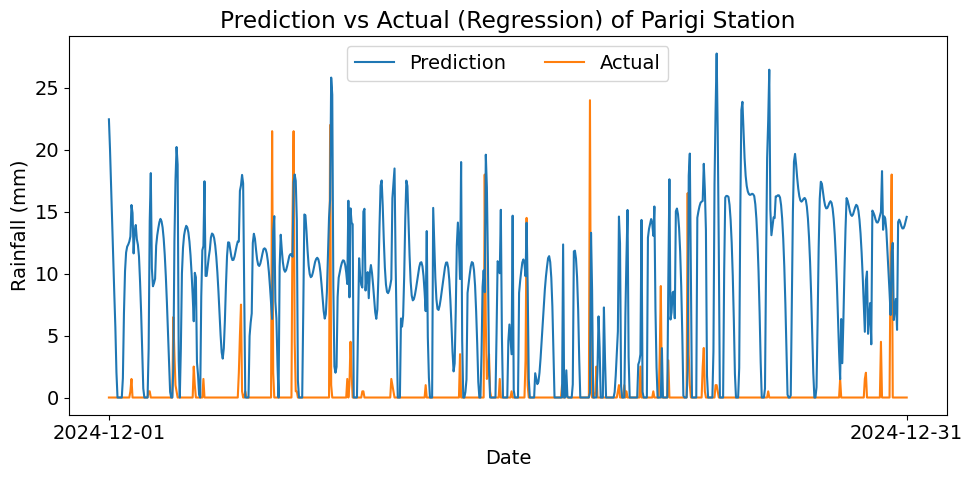

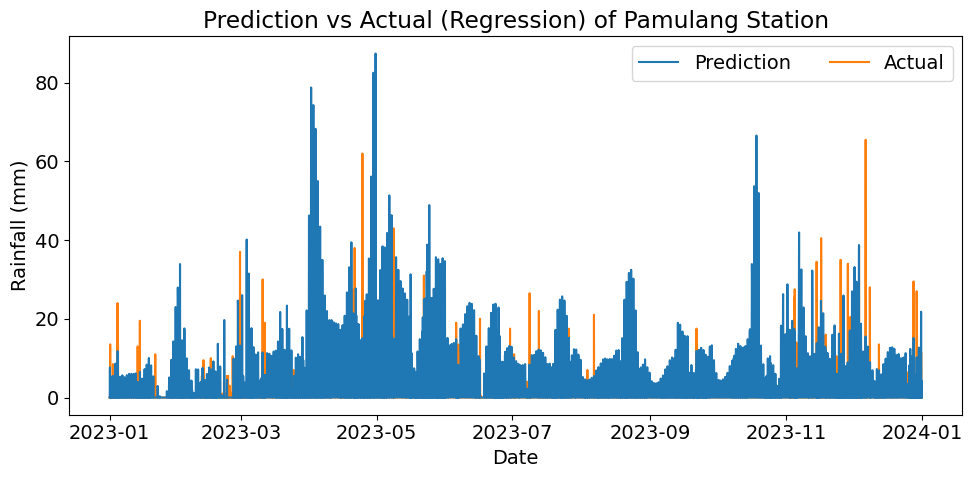

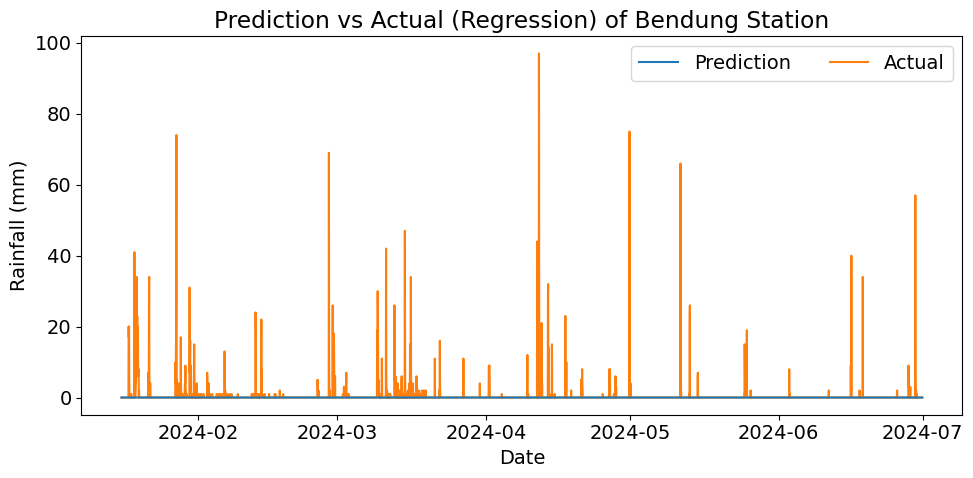

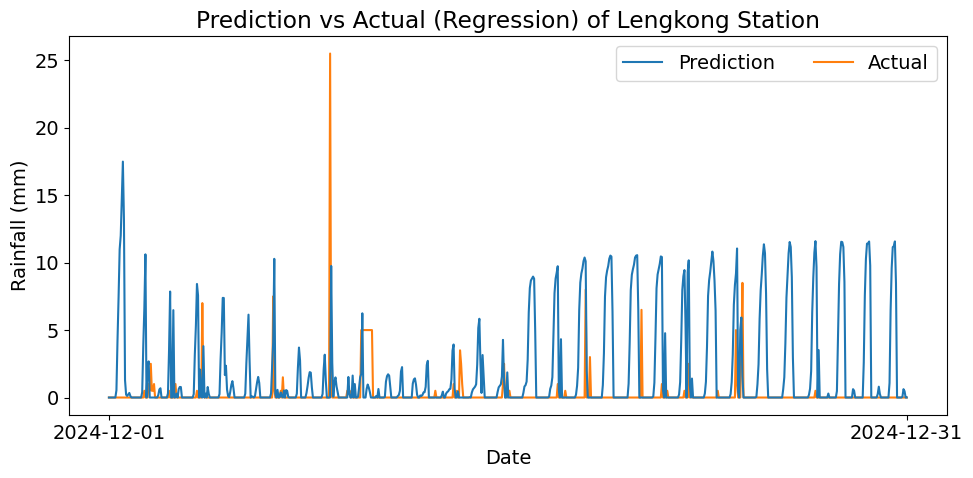

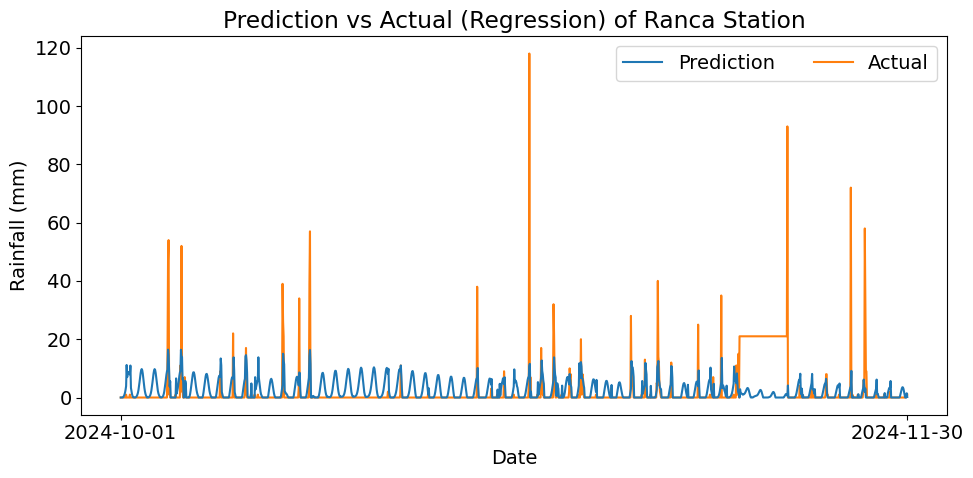

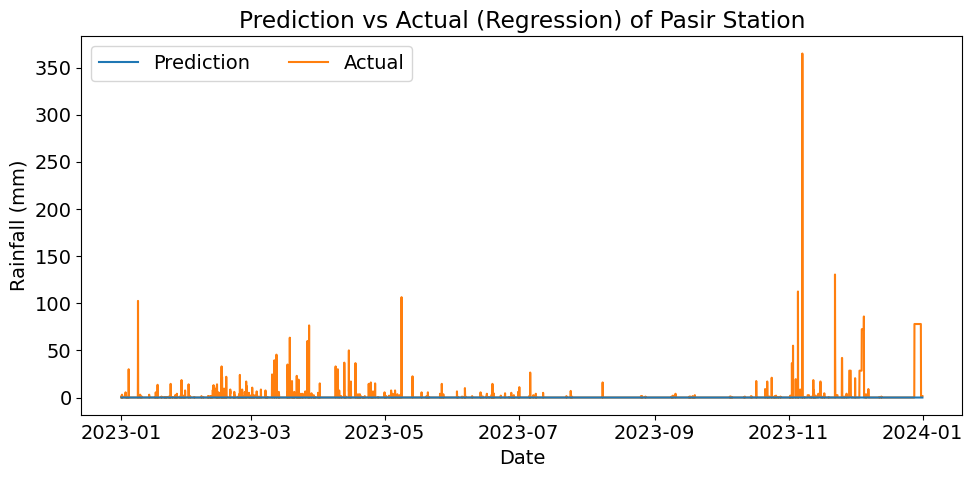

In [11]:
for name in ['cawang', 'ciawi', 'parigi', 'pamulang', 'bendung', 'lengkong', 'ranca', 'pasir']:
    val = pd.read_excel('pred_sum_reg.xlsx', sheet_name = name, usecols = 'H:J', skiprows = 1).dropna()
    #loss.index += 1
    plot_val(val)

# Prediction vs Actual (Testing)

In [14]:
def plot_test(test):
    matplotlib.rcParams.update({'font.size': 14})

    plt.figure(figsize = (10,5))
    plt.plot(test['Timetest'], test['Reg_test'], label = 'Prediction', zorder = 2)
    plt.plot(test['Timetest'], test['Target_reg_test'], label = 'Actual', zorder = 1)
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.legend(ncol=2)  # bottom center, outside
    plt.title('Prediction vs Actual (Regression) of ' + name.capitalize() + ' Station')
    
    if name == 'parigi' or name == 'lengkong' or name == 'ranca':
        plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))   
        xticks = [test['Timetest'].iloc[0], test['Timetest'].iloc[-1]]
        plt.xticks(xticks, [tick.strftime('%Y-%m-%d') for tick in xticks])
    else: plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))
    plt.tight_layout()

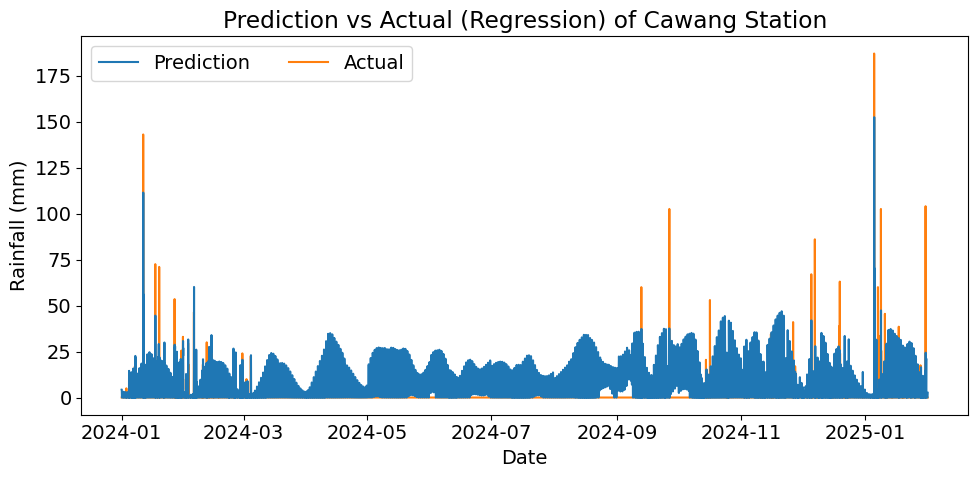

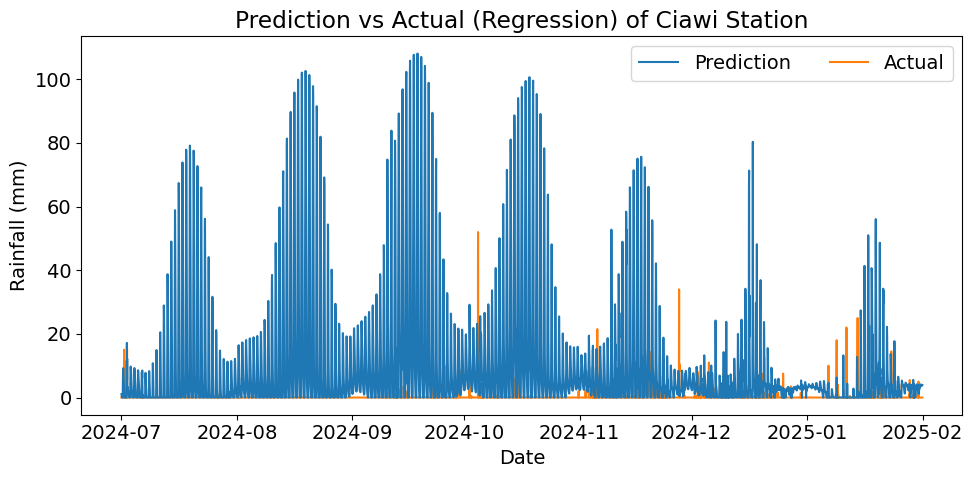

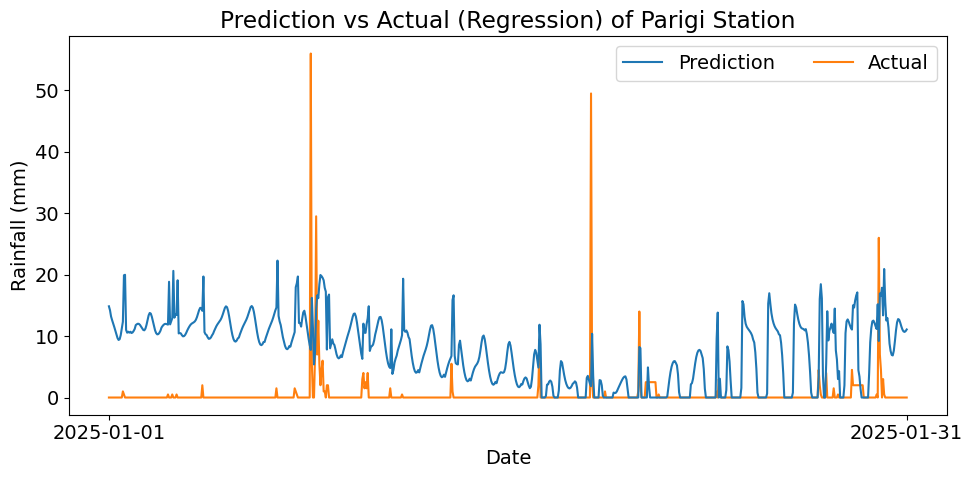

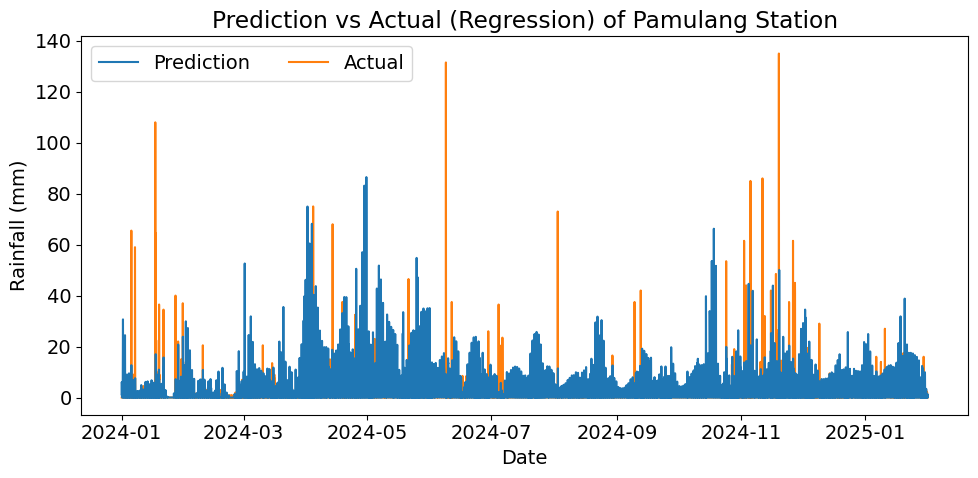

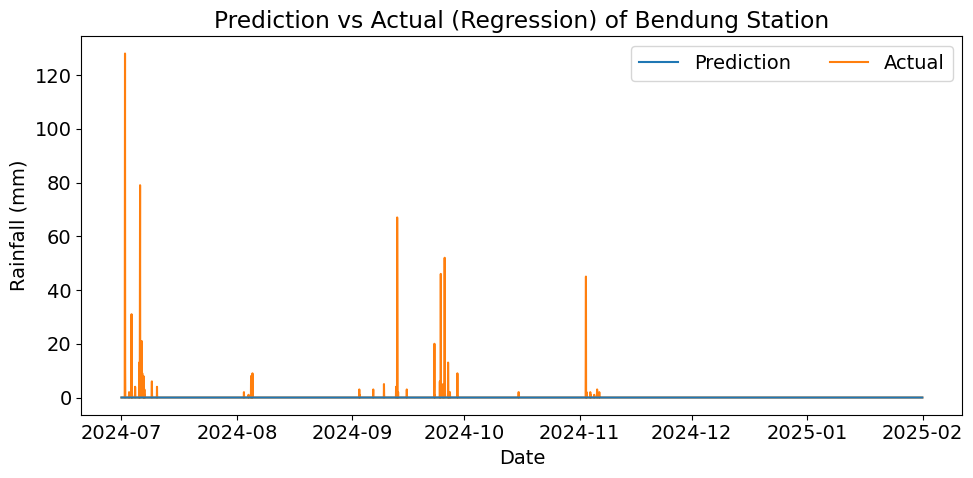

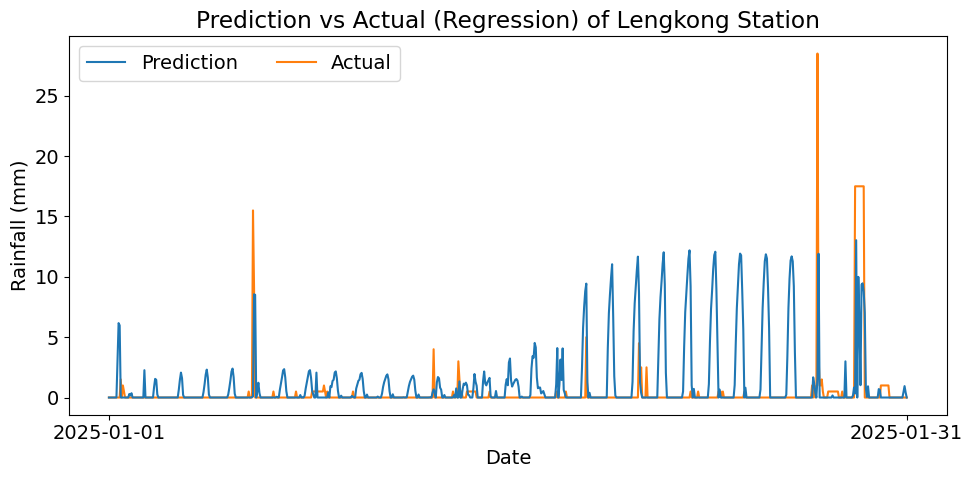

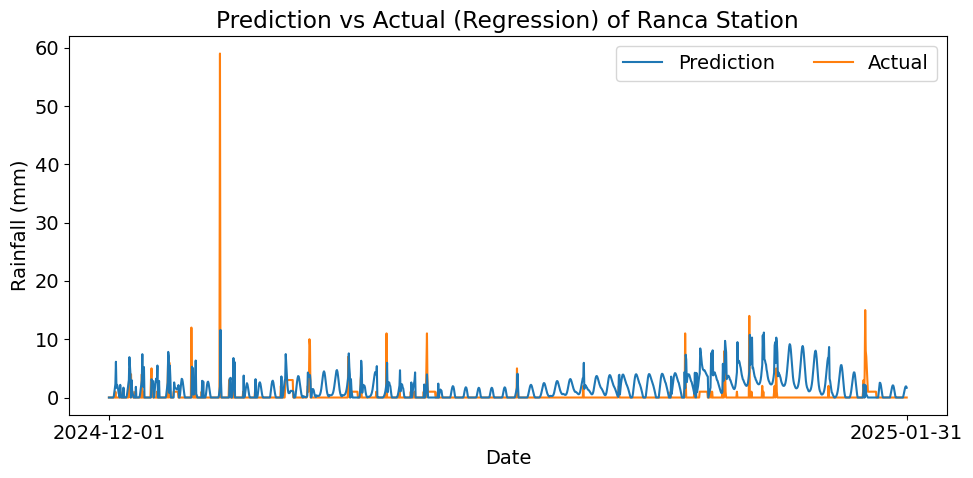

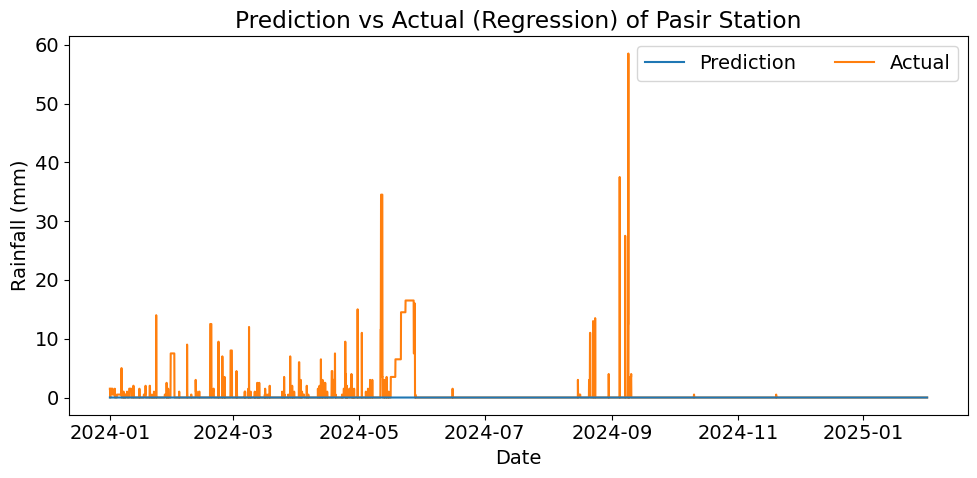

In [15]:
for name in ['cawang', 'ciawi', 'parigi', 'pamulang', 'bendung', 'lengkong', 'ranca', 'pasir']:
    test = pd.read_excel('pred_sum_reg.xlsx', sheet_name = name, usecols = 'N:P', skiprows = 1).dropna()
    #loss.index += 1
    plot_test(test)

# Metrics Calculation

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
stations = ['cawang', 'ciawi', 'parigi', 'pamulang', 'bendung', 'lengkong', 'ranca', 'pasir']
results = []

for station in stations:
    test = pd.read_excel('pred_sum_reg.xlsx', sheet_name=station, usecols='N:P', skiprows=1).dropna()
    mse = mean_squared_error(test['Target_reg_test'], test['Reg_test'])
    rmse = mse ** 0.5
    mae = mean_absolute_error(test['Target_reg_test'], test['Reg_test'])
    r2 = r2_score(test['Target_reg_test'], test['Reg_test'])
    results.append({'Station': station, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'r2': r2})

results_df = pd.DataFrame(results)
results_df

,Station,MSE,RMSE,MAE,r2
0,cawang,127.498240,11.291512,6.875571,-6.200476
1,ciawi,430.436808,20.746971,9.825331,-175.832786
2,parigi,85.128071,9.226487,7.349451,-6.925124
3,pamulang,58.133294,7.624519,2.858613,-2.179687
4,bendung,8.739729,2.956303,0.175000,-0.003516
5,lengkong,10.519417,3.243365,1.292770,-0.996742
6,ranca,8.717589,2.952556,1.685508,-1.394148
7,pasir,8.308695,2.882481,0.577823,-0.041867


In [ ]:
results_df.to_excel('trial.xlsx')

In [21]:
stations = ['cawang', 'ciawi', 'parigi', 'pamulang', 'bendung', 'lengkong', 'ranca', 'pasir']
results = []

for station in stations:
    print(station)
    test = pd.read_excel('pred_sum_reg.xlsx', sheet_name=station, usecols='N:P', skiprows=1).dropna()
    test = test[test['Target_reg_test'] > 0]  # filter for rainy events only

    if test.empty:
        print(f"Skipping {station}: No extreme rainfall data.")
        continue  # skip to next station

    try:
        mse = mean_squared_error(test['Target_reg_test'], test['Reg_test'])
        rmse = mse ** 0.5
        mae = mean_absolute_error(test['Target_reg_test'], test['Reg_test'])
        r2 = r2_score(test['Target_reg_test'], test['Reg_test'])

    except ValueError as e:
        print(f"Skipping {station} due to error: {e}")
        continue

    results.append({
        'Station': station, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'r2': r2
    })

rain_df = pd.DataFrame(results)
rain_df

cawang
ciawi
parigi
pamulang
bendung
lengkong
ranca
pasir


,Station,MSE,RMSE,MAE,r2
0,cawang,519.143636,22.784724,12.218687,-0.427257
1,ciawi,179.132103,13.384024,7.483088,-4.951229
2,parigi,159.589802,12.632886,9.361261,-0.948031
3,pamulang,244.268980,15.629107,6.958832,-0.242867
4,bendung,543.337349,23.309598,10.879518,-0.278521
5,lengkong,27.725959,5.265545,2.475934,0.204043
6,ranca,29.495443,5.430971,2.767901,-0.227700
7,pasir,82.206906,9.066802,5.717030,-0.659992


In [ ]:
rain_df.to_excel('trialrain.xlsx', index=False)